In [80]:
import numpy as np

In [151]:
def generateConvolutedWindows(imageArray, kernelShape=(2,2), stride=1):
  convWindows = []
  imgHeight = imageArray.shape[0]
  imgWidth = imageArray.shape[1]
  kernelHeight = kernelShape[0]
  kernelWidth = kernelShape[1]
  noOfChannels = imageArray.shape[2]
  
  for iImg in range(0, imgHeight, stride):
    if iImg + kernelHeight > imgHeight: break
    for jImg in range(0, imgWidth, stride):
      if jImg + kernelWidth > imgWidth: break
      convWindow = []
      for iKer in range(iImg, iImg + kernelHeight):
        for jKer in range(jImg, jImg + kernelWidth):
          pixelValue = []
          for channel in range(noOfChannels):
            pixelValue.append(imageArray[iKer, jKer, channel])
            # end for channel
          convWindow.append(pixelValue)
          # end for j
        # end for i
      convWindows.append(np.array(convWindow).reshape(kernelHeight, kernelWidth, noOfChannels))
    # end for jImg
  # end for iImg
  convWindows = np.array(convWindows)
  #print(convWindows)
  print('Convoluted Windows Shape : ', convWindows.shape)
  return convWindows

In [154]:
def generateConvolutedArray(imageArray, kernelArray, stride=1):
  noOfChannels = imageArray[0][0].shape[0]
  convArrays = []

  convWindows = generateConvolutedWindows(imageArray, kernelShape=kernelArray.shape, stride=stride)
  for window in convWindows:
    pixelValue = []
    for channel in range(noOfChannels):
      pixelValue.append(np.sum(np.dot(window[:,:, channel], kernelArray)) // noOfChannels)
      # end for channel
    convArrays.append(pixelValue)
    # end for window
  resultShape = (((imageArray.shape[0] - kernelArray.shape[0]) // stride) + 1, ((imageArray.shape[1] - kernelArray.shape[1]) // stride) + 1, noOfChannels)
  convArrays = np.array(convArrays).reshape(resultShape)
  print('Convoluted Array Shape : ', convArrays.shape)

  return convArrays

In [141]:
def generateConvolutedArrayEdgeDetection(imageArray, kernelArrayList, stride=1):
  noOfChannels = imageArray[0][0].shape[0]
  convArrays = [[] for i in range(noOfChannels)]

  convWindows = generateConvolutedWindows(imageArray, kernelShape=kernelArrayList[0].shape, stride=stride)
  for window in convWindows:
    for channel in range(noOfChannels):
      pixelVal0 = np.sum(np.dot(window[:,:, channel], kernelArrayList[0])) // noOfChannels
      pixelVal1 = np.sum(np.dot(window[:,:, channel], kernelArrayList[1])) // noOfChannels
      convArrays[channel].append(int(np.sqrt(pixelVal0 ** 2 + pixelVal1 ** 2)))
      # end for channel
    # end for window
  resultShape = (((imageArray.shape[0] - kernelArrayList[0].shape[0]) // stride) + 1, ((imageArray.shape[1] - kernelArrayList[0].shape[1]) // stride) + 1, noOfChannels)
  convArrays = np.array(convArrays).reshape(resultShape)
  print('Convoluted Array Shape : ', convArrays.shape)

  return convArrays

In [84]:
import matplotlib.pyplot as plt

In [85]:
def plotArrays(arrayMaps, size=(28, 28), cmap='viridis'):
  i = 1
  N = len(arrayMaps)
  plt.figure(figsize=size)
  for key, value in arrayMaps.items():
    plt.subplot(1, N, i)
    i = i + 1
    plt.imshow(value, cmap=cmap)
    plt.title(key)
    # end for key, value
  plt.show()

In [158]:
def generatePadding(x, paddingLayers=1):
  targetShapeM, targetShapeN = x.shape[0] + paddingLayers * 2, x.shape[1] + paddingLayers * 2
  targetX = np.zeros(shape=(targetShapeM, targetShapeN))
  for i in range(0, x.shape[0]):
    for j in range(x.shape[1]):
      targetX[i+paddingLayers][j+paddingLayers] = x[i][j]
      # end j
    # end i
  
  return targetX

In [86]:
!pwd

/content


In [87]:
!rm -f `pwd`/"sample.jpg"
#!curl -v -k "https://media.konstilo.es/product/fotomural-tigre-de-sumatra-800x800.jpg" -o `pwd`/"sample.jpg" > /dev/null 2>&1 # Tiger
#!curl -v -k "https://www.vmeprecast.com/img/slider/slider4.jpg" -o `pwd`/"sample.jpg" > /dev/null 2>&1 # Building under Construction
!curl -v -k "https://st2.cricketcountry.com/wp-content/uploads/cricket/image_20131015131036.jpg" -o `pwd`/"sample.jpg" > /dev/null 2>&1 # Saching Tendulkar

In [88]:
!ls -lrtah

total 744K
drwxr-xr-x 1 root root 4.0K Dec 21 17:29 sample_data
drwxr-xr-x 1 root root 4.0K Dec 21 17:29 .config
drwxr-xr-x 1 root root 4.0K Dec 28 12:07 ..
-rw-r--r-- 1 root root 688K Dec 28 12:35 output.png
drwxr-xr-x 1 root root 4.0K Dec 28 12:50 .
-rw-r--r-- 1 root root  39K Dec 28 12:50 sample.jpg


In [89]:
import PIL
from PIL import Image, ImageFilter

In [90]:
PIL.__version__

'7.0.0'

In [91]:
SAMPLE_IMAGE = "sample.jpg"

In [92]:
img = Image.open(SAMPLE_IMAGE)

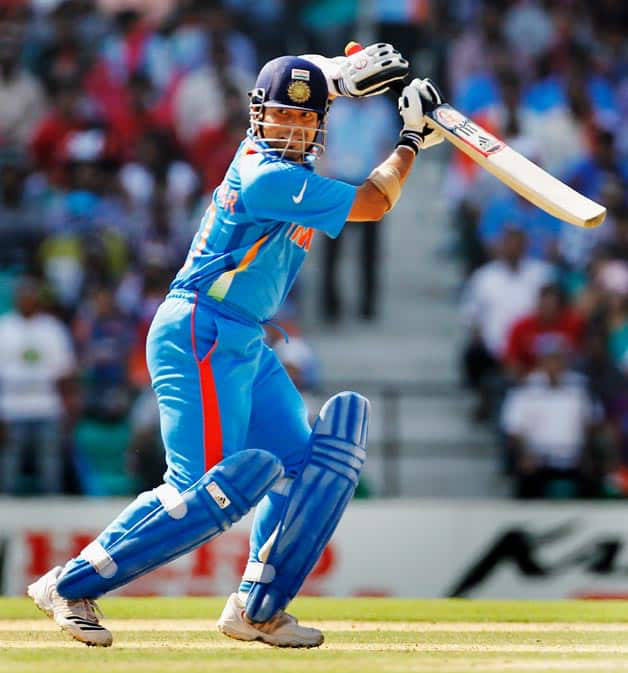

In [93]:
img

In [94]:
img.format

'JPEG'

In [95]:
img.size

(628, 673)

In [96]:
img.mode

'RGB'

In [97]:
imgArr = np.asarray(img)

In [98]:
imgArr.ndim

3

In [99]:
imgArr.shape

(673, 628, 3)

In [100]:
imgArr[0].shape

(628, 3)

In [101]:
imgArr[0][0].shape

(3,)

In [102]:
imgArr[:,:,0].shape

(673, 628)

In [103]:
red, green, blue = img.split()

In [104]:
imgArr[104][340]

array([119, 147, 187], dtype=uint8)

In [105]:
from PIL import Image, ImageDraw
from math import floor

def scaleImage(input_image, scaleRatio=0.75):
  # Compute output image width and height
  output_image_w = floor(input_image.width * scaleRatio)
  output_image_h = floor(input_image.height * scaleRatio)

  # Create output image
  output_image = Image.new("RGB", (output_image_w, output_image_h))
  draw = ImageDraw.Draw(output_image)

  x_scale = input_image.width / output_image.width
  y_scale = input_image.height / output_image.height

  # Copy pixels
  for x in range(output_image.width):
      for y in range(output_image.height):
          xp, yp = floor(x * x_scale), floor(y * y_scale)
          draw.point((x, y), input_pixels[xp, yp])

  output_image.save("output.png")
  return output_image

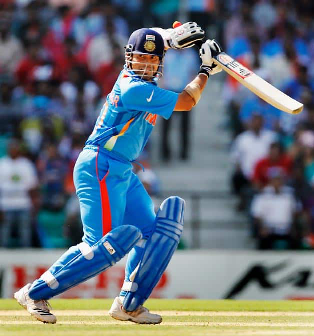

In [106]:
# Load image:
input_image = img
input_pixels = input_image.load()

output_image = scaleImage(input_image=input_image, scaleRatio=0.5)
output_image

In [107]:
output_image.size

(314, 336)

In [108]:
img.size # width * height

(628, 673)

In [109]:
imgArr.shape # height * width * pixelValue(r,g,b)

(673, 628, 3)

In [110]:
red.width

628

In [111]:
np.asarray(red).reshape(red.height, red.width, 1)

array([[[ 93],
        [ 93],
        [ 94],
        ...,
        [ 14],
        [ 14],
        [ 14]],

       [[ 90],
        [ 92],
        [ 92],
        ...,
        [ 14],
        [ 14],
        [ 14]],

       [[ 87],
        [ 87],
        [ 88],
        ...,
        [ 14],
        [ 14],
        [ 14]],

       ...,

       [[220],
        [220],
        [220],
        ...,
        [228],
        [228],
        [228]],

       [[218],
        [218],
        [218],
        ...,
        [227],
        [227],
        [227]],

       [[213],
        [213],
        [213],
        ...,
        [225],
        [225],
        [225]]], dtype=uint8)

In [112]:
imgPix = img.load()

In [113]:
imgPix[100, 118]

(68, 32, 60)

In [114]:
imgArr[118, 100]

array([68, 32, 60], dtype=uint8)

In [115]:
imgArr = np.asarray(img.resize(size=(img.height // 10, img.width // 10)))

In [116]:
imgArr = np.asarray(img)

In [155]:
#x = imgArr
x = np.asarray(green).reshape(green.height, green.width, 1)
fX, fY = 3, 3
#filter = np.random.randint(0, 2, size=(fX * fY)).reshape(fX, fY)
#filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).reshape(fX, fY) # edge detection - x
#filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).reshape(fX, fY) # edge detection - y
#filter = np.asarray([0, 1, 0, 1, -20, 1, 0, 1, 0]).reshape(3, 3)
filter = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]) # Box Blur
#filter = np.array([[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256], [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256], [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256], [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256], [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]) # Gaussian Blur
#filter = np.array([[0, -.5, 0], [-.5, 3, -.5], [0, -.5, 0 ]]) # Sharpen
convArrays = generateConvolutedArray(x, filter, stride=1)

Convoluted Windows Shape :  (420046, 3, 3, 1)
Convoluted Array Shape :  (671, 626, 1)


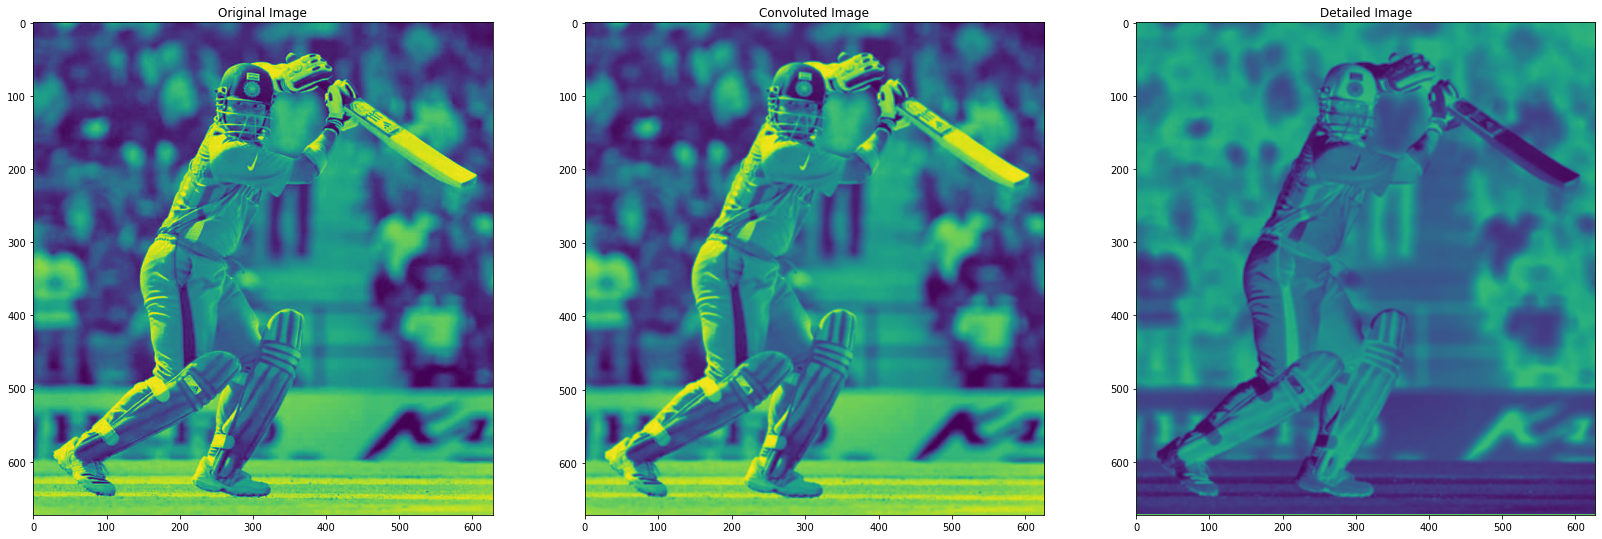

In [159]:
arrayMaps = dict()
arrayMaps['Original Image'] = x[:, :, 0]
arrayMaps['Convoluted Image'] = convArrays[:, :, 0]
arrayMaps['Detailed Image'] = arrayMaps['Original Image'] - generatePadding(arrayMaps['Convoluted Image'], 1)

plotArrays(arrayMaps)

In [119]:
#x = imgArr
x = np.asarray(green).reshape(red.height, red.width, 1)
fX, fY = 3, 3
#filter = np.random.randint(0, 2, size=(fX * fY)).reshape(fX, fY)
#filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).reshape(fX, fY) # edge detection - x
filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).reshape(fX, fY) # edge detection - y
#filter = np.asarray([0, 1, 0, 1, -20, 1, 0, 1, 0]).reshape(3, 3)
#filter = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]) # Box Blur
#filter = np.array([[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256], [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256], [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256], [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256], [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]) # Gaussian Blur
#filter = np.array([[0, -.5, 0], [-.5, 3, -.5], [0, -.5, 0 ]]) # Sharpen
convArrays = generateConvolutedArray(x, filter, stride=1)

Convoluted Windows Shape :  (420046, 3, 3, 1)
Convoluted Array Shape :  (671, 626, 1)


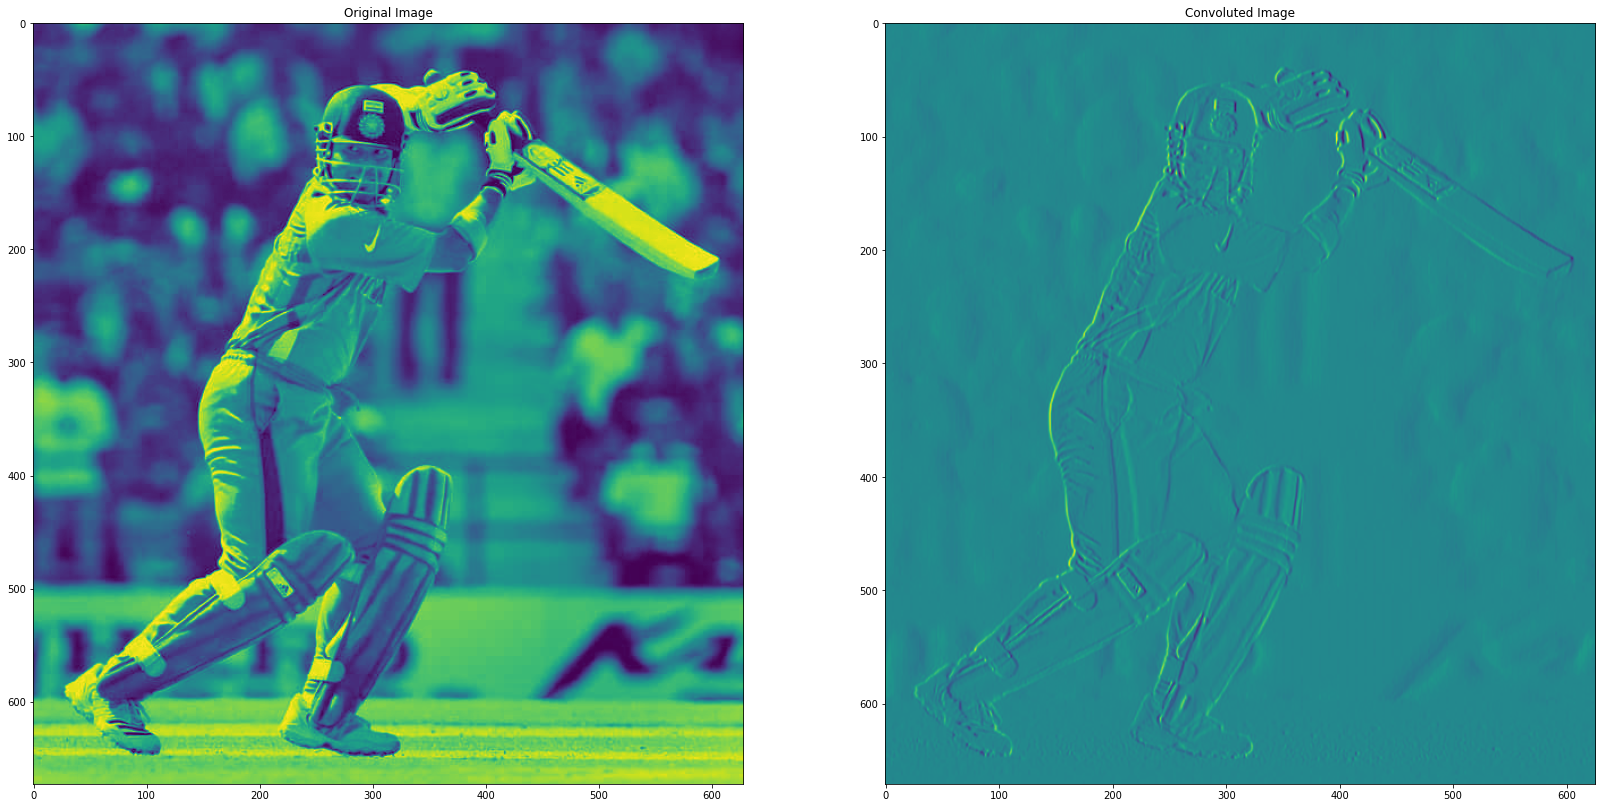

In [120]:
arrayMaps = dict()
arrayMaps['Original Image'] = x[:, :, 0]
arrayMaps['Convoluted Image'] = convArrays[:, :, 0]

plotArrays(arrayMaps)

In [160]:
x = imgArr
#x = np.asarray(green).reshape(red.height, red.width, 1)
filterX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # edge detection - x
filterY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) # edge detection - y
convArrays = generateConvolutedArrayEdgeDetection(x[:,:,0:2], [filterX, filterY], stride=1)

Convoluted Windows Shape :  (420046, 3, 3, 2)
Convoluted Array Shape :  (671, 626, 2)


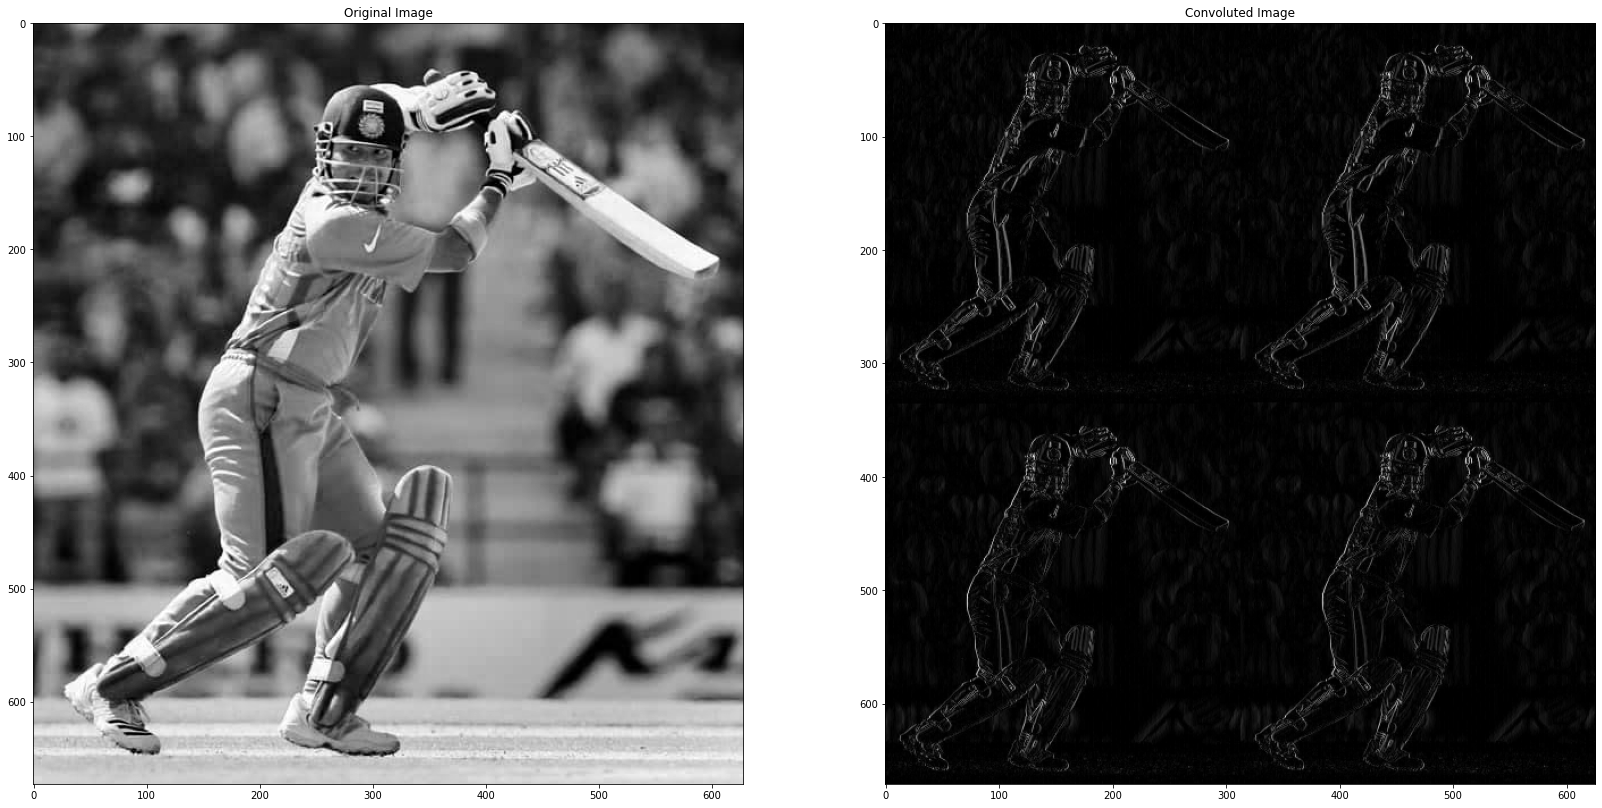

In [161]:
arrayMaps = dict()
arrayMaps['Original Image'] = x[:, :, 1]
arrayMaps['Convoluted Image'] = convArrays[:, :, 1]

plotArrays(arrayMaps, cmap='gray')

In [123]:
x.shape

(673, 628, 1)

In [124]:
x[:,:].shape

(673, 628, 1)

In [125]:
convArrays[0][0]

array([8])

In [126]:
arrayMaps

{'Convoluted Image': array([[ 8,  4,  4, ..., 20,  0,  0],
        [12,  8,  0, ..., 24,  0,  0],
        [12,  8,  4, ..., 24,  0,  0],
        ...,
        [ 0,  0,  0, ..., 24,  0,  0],
        [ 0,  0,  0, ..., 16,  0,  0],
        [ 0,  0,  0, ..., 16,  0,  0]]),
 'Original Image': array([[ 33,  33,  33, ...,  13,  13,  13],
        [ 33,  32,  32, ...,  13,  13,  13],
        [ 32,  32,  31, ...,  13,  13,  13],
        ...,
        [215, 215, 215, ..., 219, 219, 219],
        [213, 213, 213, ..., 219, 219, 219],
        [208, 208, 208, ..., 220, 220, 220]], dtype=uint8)}

In [127]:
#!curl -v -k "https://static.autox.com/uploads/2020/09/2020-land-rover-discovery-sport-in-action-m.jpg" -o `pwd`/"sample.jpg" > /dev/null 2>&1
#!curl -v -k "https://media.konstilo.es/product/fotomural-tigre-de-sumatra-800x800.jpg" -o `pwd`/"sample.jpg" > /dev/null 2>&1

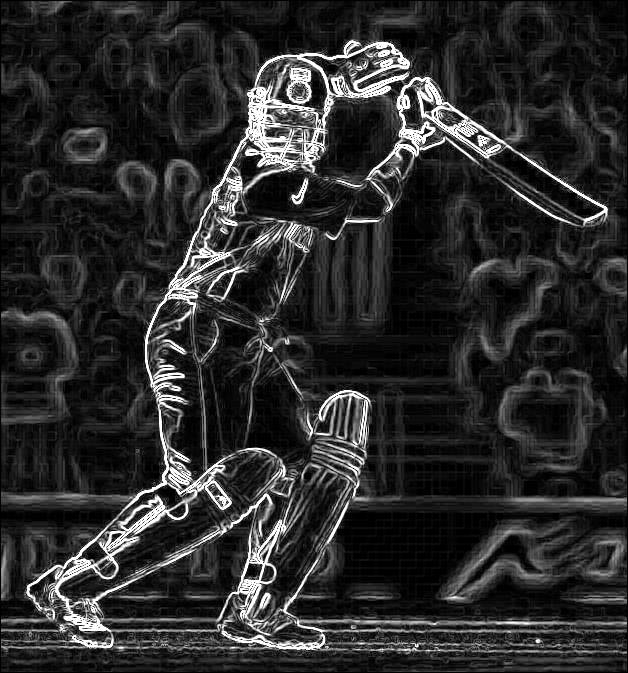

In [128]:
from PIL import Image, ImageDraw
from math import sqrt

# Load image:
input_image = Image.open("sample.jpg")
input_pixels = input_image.load()

# Calculate pixel intensity as the average of red, green and blue colors.
intensity = [[sum(input_pixels[x, y]) / 3 for y in range(input_image.height)] for x in range(input_image.width)]

# Sobel kernels
kernelx = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
kernely = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]]

stride = 1

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(stride, input_image.width - stride, stride):
    for y in range(stride, input_image.height - stride, stride):
        magx, magy = 0, 0
        for a in range(3):
            for b in range(3):
                xn = x + a - stride
                yn = y + b - stride
                magx += intensity[xn][yn] * kernelx[a][b]
                magy += intensity[xn][yn] * kernely[a][b]

        # Draw in black and white the magnitude
        color = int(sqrt(magx**2 + magy**2))
        draw.point((x, y), (color, color, color))
    
output_image.save("output.png")
output_image

In [129]:
sum(input_pixels[120, 333])

204

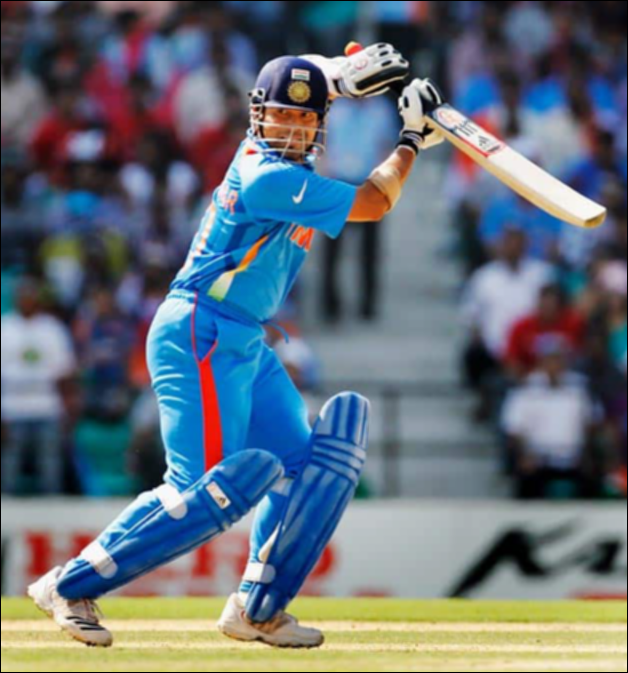

In [130]:
from PIL import Image, ImageDraw

# Load image:
input_image = Image.open("sample.jpg")
input_pixels = input_image.load()

# Box Blur kernel
box_kernel = [[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]]

# Gaussian kernel
gaussian_kernel = [[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]

# Select kernel here:
kernel = box_kernel

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        acc = [0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                acc[0] += pixel[0] * kernel[a][b]
                acc[1] += pixel[1] * kernel[a][b]
                acc[2] += pixel[2] * kernel[a][b]

        draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))
    
output_image.save("output.png")
output_image

In [131]:
aConvImg = convArrays % 255

In [132]:
bConvImg = np.asarray(output_image)

In [133]:
aConvImg.shape

(671, 626, 1)

In [134]:
bConvImg.shape

(673, 628, 3)

In [135]:
aConvImg[:, :, 0]

array([[ 8,  4,  4, ..., 20,  0,  0],
       [12,  8,  0, ..., 24,  0,  0],
       [12,  8,  4, ..., 24,  0,  0],
       ...,
       [ 0,  0,  0, ..., 24,  0,  0],
       [ 0,  0,  0, ..., 16,  0,  0],
       [ 0,  0,  0, ..., 16,  0,  0]])

In [136]:
bConvImg[:, :, 0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,  90,  91, ...,  13,  13,   0],
       [  0,  87,  87, ...,  13,  13,   0],
       ...,
       [  0, 220, 220, ..., 228, 228,   0],
       [  0, 216, 216, ..., 226, 226,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [137]:
765 % 255

0